In [1]:
import numpy as np

import pandas as pd
from pandas import Timedelta as td
import matplotlib.pyplot as plt

In [130]:
from utils.audio_to_logits import infer_character_distribution, alphabet, STEP_MS

filepath = 'audio/02-11-30-short.wav'
true_text = "with the progressive dawn the outlines of an immense camp became visible"

logits = infer_character_distribution(filepath)

logits_backup = logits.copy()

In [3]:
alph = np.array(list(alphabet._str_to_label.keys()) + ['-'])
timesteps = pd.timedelta_range(start=td(0), periods=logits.shape[0], freq=td(f'{STEP_MS} ms'))
probdist = pd.DataFrame(logits,
                        index=timesteps,
                        columns=alph)
probdist

,,a,b,c,d,e,f,g,h,i,...,s,t,u,v,w,x,y,z,',-
00:00:00,0.000007,0.000027,4.621010e-07,0.000002,6.310609e-07,0.000003,4.852125e-07,0.000003,5.671518e-07,0.000009,...,0.000009,0.000009,0.000010,1.458686e-07,0.000004,1.052257e-07,0.000019,2.561006e-08,5.195279e-07,0.999885
00:00:00.020000,0.000007,0.000005,9.323957e-06,0.000002,2.363375e-06,0.000002,2.164003e-06,0.000007,1.120165e-06,0.000016,...,0.000011,0.000048,0.000007,2.362756e-07,0.000018,9.535923e-08,0.000021,1.413997e-08,3.036690e-07,0.999813
00:00:00.040000,0.000005,0.000006,1.298754e-05,0.000003,2.103514e-06,0.000003,3.529280e-06,0.000004,3.806056e-06,0.000022,...,0.000005,0.000033,0.000008,1.240120e-07,0.000025,1.720524e-08,0.000051,7.355836e-09,2.771724e-07,0.999779
00:00:00.060000,0.000003,0.000016,1.536904e-05,0.000002,1.579160e-06,0.000006,3.284241e-06,0.000001,4.978371e-06,0.000055,...,0.000003,0.000006,0.000007,4.408792e-08,0.000020,9.975881e-09,0.000059,2.312155e-09,3.776414e-07,0.999760
00:00:00.080000,0.000004,0.000026,1.754366e-05,0.000005,3.754077e-06,0.000011,6.132962e-06,0.000002,1.630594e-05,0.000045,...,0.000009,0.000018,0.000023,2.883358e-07,0.000059,1.003231e-07,0.000147,2.678794e-08,5.872891e-07,0.999520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:00:05.660000,0.057455,0.036645,3.177408e-02,0.033453,2.881138e-02,0.033084,3.251285e-02,0.026948,3.605717e-02,0.034513,...,0.042472,0.046500,0.026331,2.892594e-02,0.032510,2.241859e-02,0.030575,1.741794e-02,1.773833e-02,0.098960
00:00:05.680000,0.057455,0.036645,3.177408e-02,0.033453,2.881138e-02,0.033084,3.251285e-02,0.026948,3.605717e-02,0.034513,...,0.042472,0.046500,0.026331,2.892594e-02,0.032510,2.241859e-02,0.030575,1.741794e-02,1.773833e-02,0.098960
00:00:05.700000,0.057455,0.036645,3.177408e-02,0.033453,2.881138e-02,0.033084,3.251285e-02,0.026948,3.605717e-02,0.034513,...,0.042472,0.046500,0.026331,2.892594e-02,0.032510,2.241859e-02,0.030575,1.741794e-02,1.773833e-02,0.098960
00:00:05.720000,0.057455,0.036645,3.177408e-02,0.033453,2.881138e-02,0.033084,3.251285e-02,0.026948,3.605717e-02,0.034513,...,0.042472,0.046500,0.026331,2.892594e-02,0.032510,2.241859e-02,0.030575,1.741794e-02,1.773833e-02,0.098960


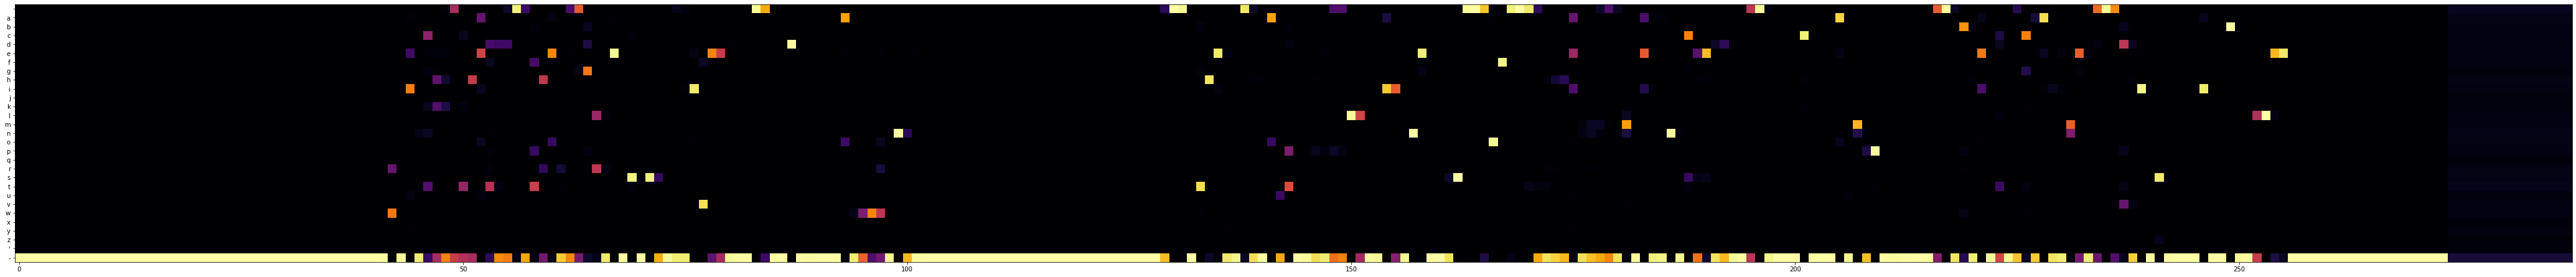

In [6]:
plt.figure(figsize=(len(probdist) / 5, 20))
plt.imshow(logits.T, cmap='inferno')
plt.yticks(np.arange(len(alph)), alph)
plt.tight_layout()
plt.show()

In [4]:
# Top three characters for every moment
top_chars = logits.argsort(axis=1)[:, ::-1]
top_n_chars = 3

top = np.hstack([
    alph[top_chars][:, :top_n_chars],
    logits[np.repeat([np.arange(top_chars.shape[0])], top_n_chars, axis=0).T, top_chars[:, :top_n_chars]].round(2)
])
top

array([['-', 'a', 'y', '1.0', '0.0', '0.0'],
       ['-', 't', 'y', '1.0', '0.0', '0.0'],
       ['-', 'y', 't', '1.0', '0.0', '0.0'],
       ...,
       ['-', ' ', 't', '0.1', '0.06', '0.05'],
       ['-', ' ', 't', '0.1', '0.06', '0.05'],
       ['-', ' ', 't', '0.1', '0.06', '0.05']], dtype='<U32')

In [186]:
probs = logits[:105, :].copy()  # the progressive dawn
# probs[:, 0] += probs[:, -1]  # mix spaces and blanks (for simplicity)

# If the model inserts a blank or a space after a character,
# prolong that character's probability so that DTW simply repeats it,
# instead of stopping the thread, for example:
#   blank  d    a    w        blank  d    a    w
#     0    0.8  0    0          0    0.8  0    0
#     0.5  0.1  0    0          0.5  0.5  0    0
#     0.8  0    0    0    ->    0.8  0.4  0    0
#     0.1  0    0.7  0          0.1  0    0.7  0
#     0    0    0    0.7        0    0    0    0.7
for i in range(1, len(probs)):
    probs[i, :-1] += probs[i, -1] * probs[i - 1, :-1]

# Surround with blanks b/c recording has silence in the beginning and at the end
# and one of assumptions of DTW is that index of one array maps onto first index of the other array
transcript = ' ' + 'progressive dawn' + ' '
# transcript = ' ' + true_text + ' '

trpt_ind_map = pd.Series(np.arange(len(alph)), index=alph)

trpt_inds = trpt_ind_map[list(transcript)].values
p_fit = probs[:, trpt_inds]

mapping = pd.DataFrame(p_fit, columns=list(transcript))
mapping

,,p,r,o,g,r,e,s,s,i,v,e,,d,a,w,n,
0,0.000007,0.000001,0.000005,0.000002,0.000003,0.000005,0.000003,0.000009,0.000009,0.000009,1.458686e-07,0.000003,0.000007,6.310609e-07,0.000027,0.000004,0.000001,0.000007
1,0.000014,0.000004,0.000008,0.000010,0.000010,0.000008,0.000005,0.000020,0.000020,0.000025,3.821170e-07,0.000005,0.000014,2.994318e-06,0.000032,0.000022,0.000003,0.000014
2,0.000018,0.000007,0.000011,0.000018,0.000015,0.000011,0.000007,0.000026,0.000026,0.000047,5.060445e-07,0.000007,0.000018,5.097169e-06,0.000038,0.000047,0.000006,0.000018
3,0.000022,0.000008,0.000013,0.000035,0.000016,0.000013,0.000013,0.000029,0.000029,0.000102,5.500110e-07,0.000013,0.000022,6.675106e-06,0.000053,0.000067,0.000008,0.000022
4,0.000025,0.000010,0.000037,0.000057,0.000018,0.000037,0.000024,0.000038,0.000038,0.000147,8.380825e-07,0.000024,0.000025,1.042598e-05,0.000079,0.000126,0.000019,0.000025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.000113,0.000003,0.001013,0.000105,0.000265,0.001013,0.005650,0.000009,0.000009,0.000003,6.021805e-05,0.005650,0.000113,8.802992e-05,0.000062,0.001139,0.989236,0.000113
101,0.000171,0.000003,0.001004,0.000105,0.000275,0.001004,0.013650,0.000035,0.000035,0.000003,5.974828e-05,0.013650,0.000171,9.827063e-05,0.000065,0.001130,0.981110,0.000171
102,0.000194,0.000003,0.001003,0.000108,0.000279,0.001003,0.015803,0.000143,0.000143,0.000004,5.966055e-05,0.015803,0.000194,1.978376e-04,0.000073,0.001127,0.978674,0.000194
103,0.000198,0.000003,0.001006,0.000111,0.000282,0.001006,0.016123,0.000370,0.000370,0.000006,5.968305e-05,0.016123,0.000198,4.274272e-04,0.000079,0.001127,0.977836,0.000198


In [187]:
from fastdtw import fastdtw

trpt_inds = trpt_ind_map[list(transcript)].values
dist, path = fastdtw(trpt_inds, np.arange(len(probs)), radius=50,
                     dist=lambda trpt_i, mat_i: -probs[int(mat_i), int(trpt_i)])
for i, j in path:
    print(i, j, transcript[i])

0 0  
0 1  
0 2  
0 3  
0 4  
0 5  
0 6  
0 7  
0 8  
0 9  
0 10  
0 11  
0 12  
0 13  
0 14  
0 15  
0 16  
0 17  
0 18  
0 19  
0 20  
0 21  
0 22  
0 23  
0 24  
0 25  
0 26  
0 27  
0 28  
0 29  
0 30  
0 31  
0 32  
0 33  
0 34  
0 35  
0 36  
0 37  
0 38  
0 39  
0 40  
0 41  
0 42  
0 43  
0 44  
0 45  
0 46  
0 47  
0 48  
0 49  
0 50  
0 51  
0 52  
0 53  
0 54  
0 55  
0 56  
0 57  
0 58  
0 59  
0 60  
0 61  
0 62  
0 63  
1 63 p
2 63 r
3 63 o
4 63 g
4 64 g
4 65 g
5 65 r
5 66 r
6 66 e
6 67 e
6 68 e
6 69 e
7 69 s
7 70 s
7 71 s
8 71 s
8 72 s
8 73 s
8 74 s
8 75 s
9 75 i
9 76 i
9 77 i
10 77 v
10 78 v
11 78 e
11 79 e
11 80 e
11 81 e
11 82 e
11 83 e
12 83  
12 84  
12 85  
12 86  
12 87  
13 87 d
13 88 d
13 89 d
13 90 d
13 91 d
13 92 d
13 93 d
14 93 a
14 94 a
14 95 a
15 95 w
15 96 w
15 97 w
15 98 w
16 98 n
16 99 n
16 100 n
16 101 n
16 102 n
16 103 n
16 104 n
17 104  


In [185]:
import struct
import wave


def read_samples(wave_file, nb_frames):
    frame_data = wave_file.readframes(nb_frames)
    if frame_data:
        sample_width = wave_file.getsampwidth()
        nb_samples = len(frame_data) // sample_width
        format = {1: "%db", 2: "<%dh", 4: "<%dl"}[sample_width] % nb_samples
        return struct.unpack(format, frame_data)
    else:
        return ()
w = wave.open(filepath, 'r')
samples = np.array(read_samples(w, w.getnframes()))

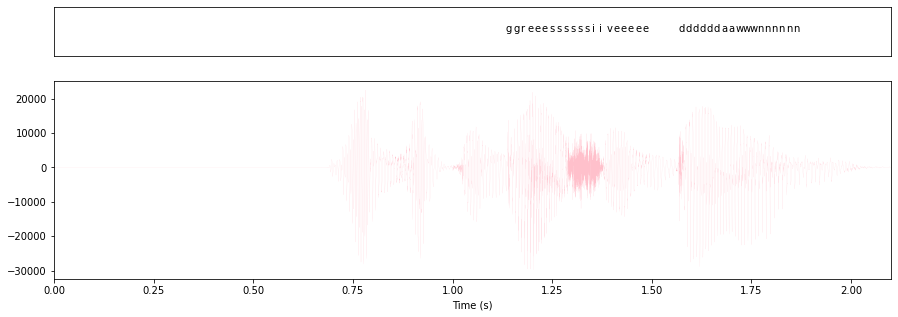

In [190]:
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(15, 5), gridspec_kw=dict(height_ratios=[1, 4]))

sub_samples = samples[:int(2.1 * w.getframerate())].copy()

t = np.linspace(0, len(sub_samples) / w.getframerate(), len(sub_samples))
ax2.plot(t, sub_samples, color='pink', lw=0.1)

next_j = path[1][1]
for i, (trpt_i, rec_i) in enumerate(path[:-1]):
    next_j = path[i + 1][1]
    if rec_i != next_j:
        ax1.annotate(transcript[trpt_i], xy=(rec_i * 18 / 1000, 0.5))
    # print(i, j, transcript[i])

ax2.set_xlim(0, t.max())
ax1.set_xlim(0, t.max())

ax2.set_xlabel('Time (s)')
# hide axes for text
ax1.axes.get_yaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
plt.show()